# Kennard-Stone Algorithm
The Kennard-Stone algorithm was first described in 1969 ([R. W. Kennard, L. A. Stone, *Technometrics*, **1969**,
*11*, 137–148.](https://www.tandfonline.com/doi/abs/10.1080/00401706.1969.10490666)) to select a diverse subset based on distance. 

## Applicability
**Limitations**

Although this algorithm can be used to perform data set splitting for machine learning, the resulting test set covers the same feature space as the training set. On one hand, this maximizes the feature space covered by the training set. On the other hand, the test scores do not represent a realistic scenario for prediction. 

**Diversity Set**

Due to the deterministic nature of the Kennard-Stone algorithm it is very useful to create a so-called diversity set. For example to reduce the number of molecules selected for synthesis to fit capacity while maintaining the distribution of the original set.  


## Imports & Settings

In [1]:
### Imports
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Add the utils directory to the path
sys.path.append(os.path.abspath("../utils"))

from chem import KennardStone

In [3]:
np.set_printoptions(precision=2)

# Data
The chemical structures of BRD4 inhibitors are encoded in bit vectors. For this data set **Morgan fingerprints** `rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect` was used. 






In [4]:
### Load the data
df = pd.read_pickle("data/morgan_2048_df.pkl")
df

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL1232461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1233528,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1313432,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1344420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1361699,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL5440963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL848,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Method


## Distance Matrix
Euclidean distance will be used. Between two vectors **x** and **y** in an n-dimensional space it is defined as:

$$
\text{Euclidean dist}(x, y) = \sqrt{ \sum_{i=1}^{n} (x_i - y_i)^2 }
$$

For small data sets it can be calculated by broadcasting in an additional dimension. 

In [5]:
### Demo data (4 sample, 2 features)
demo_X = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    ])

### Calculating the Euclidean distance matrix with broadcasting
np.sqrt(((demo_X[None,:,:] - demo_X[:,None,:])**2).sum(axis=-1))

array([[0.  , 1.  , 1.  , 1.41],
       [1.  , 0.  , 1.41, 1.  ],
       [1.  , 1.41, 0.  , 1.  ],
       [1.41, 1.  , 1.  , 0.  ]])

For **binary vectors** (such as Morgan fingerprints used here), the squared Euclidean distance simplifies to the **Hamming distance** — i.e., the number of positions where the vectors differ:

$$
 \sum_{i=1}^{n} (x_i - y_i)^2 = \sum_{i=1}^{n} x_i + \sum_{i=1}^{n} y_i - 2 \sum_{i=1}^{n} x_i y_i
$$
Where:

- $ \sum_{i=1}^{n} x_i $ is the number of 1s in **x**
- $ \sum_{i=1}^{n} y_i $ is the number of 1s in **y**
- $ \sum_{i=1}^{n} x_i y_i $ is the number of **shared 1s** (intersection)

Computing the distance matrix using this method is more efficient for high-dimensional distance matrixes with a large number of samples and features. 


In [6]:
### Calculate the intersection matrix
intersection = demo_X @ demo_X.T

### Count the number of 1s for each compound
X_norm = demo_X.sum(axis=1).reshape(-1, 1)

### Calculate the Hamming distance matrix
hamming = X_norm + X_norm.T - 2 * intersection

### Euclidean distance
np.sqrt(hamming)

array([[0.  , 1.  , 1.  , 1.41],
       [1.  , 0.  , 1.41, 1.  ],
       [1.  , 1.41, 0.  , 1.  ],
       [1.41, 1.  , 1.  , 0.  ]])

# Demonstrative example
Generating a diversity set using the [`KennardStone`](../utils/chem.py) class. 

In [44]:
### Instantiate and fit the model
model = KennardStone().fit(df)

In [45]:
### Split the data
kennard_stone_subset = model.split(subset_size=0.10)
kennard_stone_subset

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL1233528,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1381011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
CHEMBL1480862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
CHEMBL1507539,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL1698814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL5432981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL5434041,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL5434208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Diversity Set with Kennard-Stone or Butina Clustering
The Kennard-Stone algorithm is very useful for subsetting an existing set of molecules to a smaller set with a similar distribution, a so-called *diversity set* covering the same chemical space of the original set. Such a diversity set can also be generated by selecting the centroids obtained from [Butina clustering](Butina.ipynb) assuming that the centroid is representative for the respective cluster. 

In the following analysis two diversity sets of equal size (10% of the original data set) were generated using **Butina clustering** and **Kennard-Stone** splitting as described above. In both cases the same Morgan fingerprints (2048 bit) were used as input features and the same coordinates (obtained from tSNE dimensionality reduction) are used for visualization. 

The scatterplot shows that the *Butina subset* is located primarily in the periphery of the tSNE plot. The *Kennard-Stone subset* on the other hand is clustered closer around the origin. It is not surprising that the overlap between both subsets (12 compounds or 5%) is minimal. The fact that 132 (or 55%) of the *Kennard-Stone subset* are classified as *Butina singletons* (non-cluster members) demonstrates the fundamental difference in the two approaches: *Kennard-Stone splitting* covers the given chemical space best by selecting all edge cases. Whereas, *Butina clustering* provides the most representative members (the centroids) of the largest clusters. 

When inspecting diversity sets visually (not shown in this repository) it feels like Kennard-Stone selects all *freak compounds* and Butina selects one example from each series. On the other hand, Kennard-Stone represents the chemical space much better.  

In [41]:
### Loading the results from Butina clustering 
butina_df = pd.read_pickle('data/butina_clusters_66.pkl')

### Use the same subset size
subset_size = len(kennard_stone_subset)

### Subsetting for the top cluster centroids
butina_subset_ids = butina_df.loc[butina_df['Centroid']].copy().sort_values(by='Cluster').head(subset_size).index

### Create a boolean subset column
butina_df['Subset'] = False
butina_df.loc[butina_subset_ids, 'Subset'] = True

butina_df

,Cluster,Centroid,Singleton,tsne_x,tsne_y,Subset
ID,,,,,,
CHEMBL1232461,372,True,True,25.143593,49.587025,False
CHEMBL1233528,373,True,True,-38.321075,-57.251869,False
CHEMBL1313432,374,True,True,12.222116,-8.992769,False
CHEMBL1344420,89,False,False,-7.628333,-66.965744,False
CHEMBL1361699,375,True,True,11.197386,15.300112,False
...,...,...,...,...,...,...
CHEMBL5440963,0,False,False,22.612637,58.660271,False
CHEMBL848,1115,True,True,-1.587567,-11.965448,False
CHEMBL9,1116,True,True,3.198491,-3.171075,False


In [42]:
### Using pre-computed t-SNE coordinates
kennard_stone_df = butina_df[['tsne_x', 'tsne_y']].copy()

### Boolean subset column
kennard_stone_df['Subset'] = kennard_stone_df.index.isin(kennard_stone_subset.index)

kennard_stone_df

,tsne_x,tsne_y,Subset
ID,,,
CHEMBL1232461,25.143593,49.587025,False
CHEMBL1233528,-38.321075,-57.251869,True
CHEMBL1313432,12.222116,-8.992769,False
CHEMBL1344420,-7.628333,-66.965744,False
CHEMBL1361699,11.197386,15.300112,False
...,...,...,...
CHEMBL5440963,22.612637,58.660271,False
CHEMBL848,-1.587567,-11.965448,False
CHEMBL9,3.198491,-3.171075,True


239 compounds (10.0% of the total data set) are in each subset
12 compounds (5.0% of one subset) are in both subsets
132 compounds (55.2% of one subset) in the Kennard-Stone subset are Butina singletons


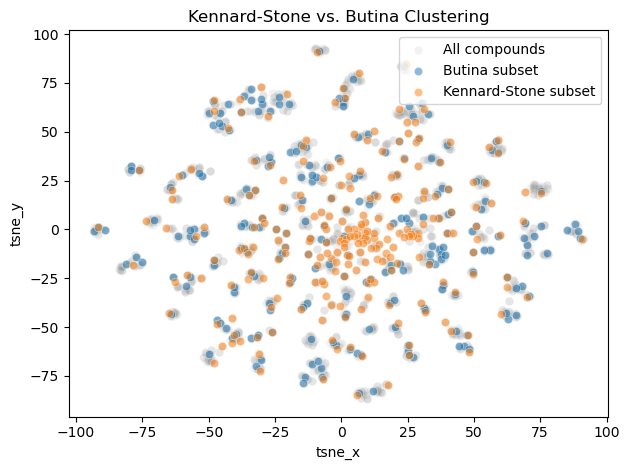

In [58]:
### Analyzis
overlap = butina_df.loc[butina_df['Subset']].index.isin(kennard_stone_df.loc[kennard_stone_df['Subset']].index).sum()
singletons = butina_df.loc[butina_df['Singleton']].index.isin(kennard_stone_df.loc[kennard_stone_df['Subset']].index).sum()

print(f"{subset_size} compounds ({subset_size/len(butina_df):.1%} of the total data set) are in each subset")
print(f"{overlap} compounds ({overlap/subset_size:.1%} of one subset) are in both subsets")
print(f"{singletons} compounds ({singletons/subset_size:.1%} of one subset) in the Kennard-Stone subset are Butina singletons")

### Plotting all compounds
sns.scatterplot(
    x="tsne_x",
    y="tsne_y",
    data=butina_df,
    label="All compounds",
    color="gray",
    alpha=0.1,
)

### Plotting the subset from Butina clustering
sns.scatterplot(
    x="tsne_x",
    y="tsne_y",
    data=butina_df.loc[butina_df['Subset']],
    label="Butina subset",
    alpha=0.5,
)

### Plotting the subset from Kennard-Stone splitting
sns.scatterplot(
    x="tsne_x",
    y="tsne_y",
    data=kennard_stone_df.loc[kennard_stone_df['Subset']],
    label="Kennard-Stone subset",
    alpha=0.5,
)

plt.title("Kennard-Stone vs. Butina Clustering")
plt.tight_layout()
plt.show()